# <center> Load Database </center>

In [1]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

from nudca.io import (
    serialize_decay_database,
    load_decay_database,
    serialize_decay_matrix,
    load_decay_matrix
)

# serialize_decay_database(data_source='ENDF-B-VIII.1_decay')
# serialize_decay_matrix(data_source='ENDF-B-VIII.1_decay')

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')

print(decay_database.nuclides)

['Ds-279M' 'Hs-273' 'Ds-273' ... 'He-3' 'H-2' 'H-1']


# <center> DecayDiagram </center>

In [1]:
import os
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

from nudca.io import load_decay_database
from nudca.decay_network import DecayDiagram

# nuclide = 'Ac-224'
nuclide = 'Ni56'

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
decay_diagram = DecayDiagram(decay_database)

# radionuclide     = decay_diagram.nuclide
# half_life        = decay_diagram.half_life
# decay_modes      = decay_diagram.decay_modes
# progeny          = decay_diagram.progeny
# branching_ratios = decay_diagram.branching_ratios

# print('Radionuclide: ', radionuclide )
# print('Half life: ', half_life)
# print('Progeny: ', progeny)
# print('Decay modes:', decay_modes)
# print('Branching ratios: ', branching_ratios)

# decay_diagram.plot_nuclear_chart()

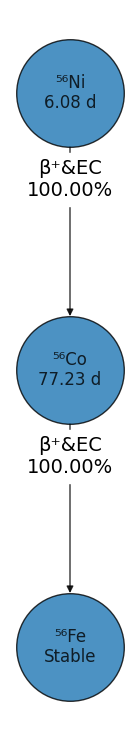

In [2]:
nuclide = 'Ni56'
fig, axes = decay_diagram.plot_decay_chains(nuclide)
fig.tight_layout()
# fig.savefig('/home/yolo/NutstoreFiles/MYDOC/WEB/NuDCA/static/images/Tutorial/DecayChains_Ni56.png', dpi=150)

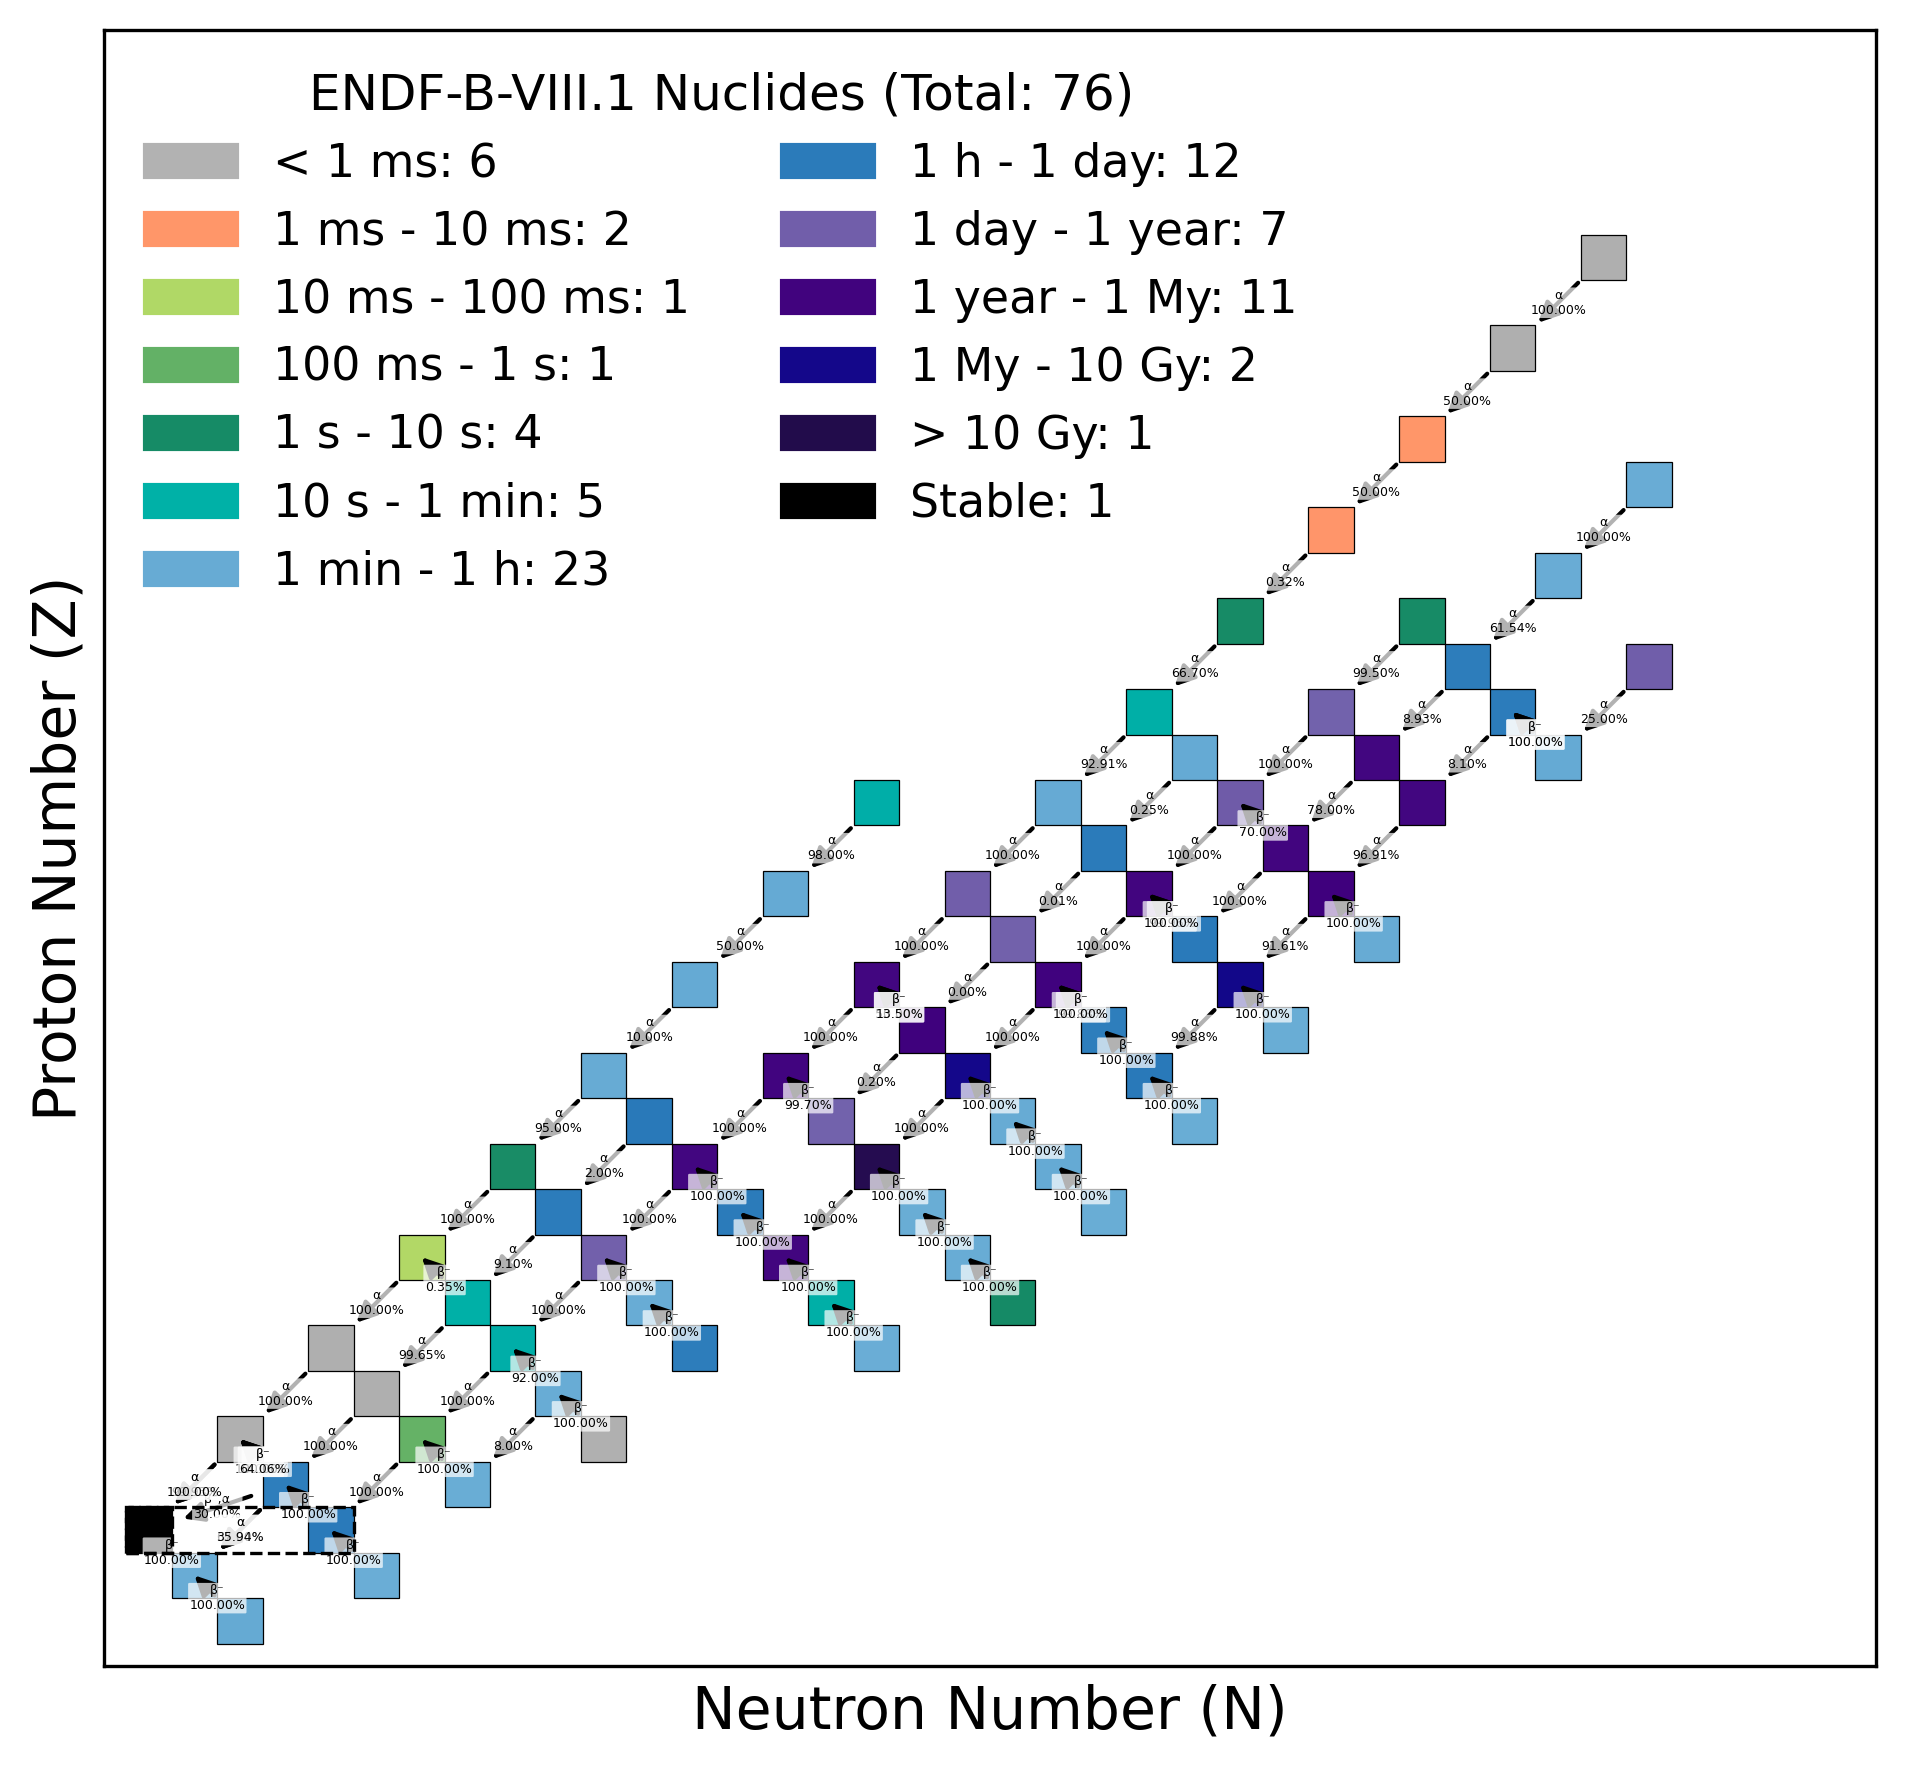

In [3]:
nuclide = 'Pb208'
# fig, axes = decay_diagram.plot_rProcess_chains(nuclide)
fig = decay_diagram.plot_local_nuclear_chart_for_rprocess_chain(nuclide)
fig.tight_layout()
# fig.savefig('/home/yolo/NutstoreFiles/MYDOC/WEB/NuDCA/static/images/Tutorial/ReverseDecayChains_Fe56.png', dpi=500)
fig.savefig('rProcessChains_Pb208.png', dpi=500)

# <center> AbundanceEstimator </center>

In [1]:
import os
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parent))

import numpy as np
from nudca.io import load_decay_database, AbundanceEstimator

decay_database = load_decay_database(data_source='ENDF-B-VIII.1_decay')
calculator = AbundanceEstimator(decay_database)

final_abundances = {'Ag109': 1.0e-5}
initial_abundances = calculator.initial_abundances_rProcess(final_abundances)
print(initial_abundances)

{'Ru-109': 4.9999999999999996e-06, 'Pd-109M': 4.9999999999999996e-06}


In [ ]:
# rprocess_chains = calculator.build_rProcess_chains(nuclide)
# chain_contributions = calculator._calculate_chain_contributions(rprocess_chains)
# initial_abundances = calculator.calculate_initial_abundances(rprocess_chains, nuclide, 1.0e-5)